# Mall Customer Patterns using K-Means Clustering

**Scenario**: We receive a dataset of mall customers which lists their customer ID, gender, age, annual income, and spending score (1-100).

**Goal**: Explore the dataset.

**Results**: 

Clustering was used to distinguish various groups of customers who spend at this mall. We found that five was the optimal number of clusters. For each cluster, different approaches can be applied to potentially change behavior.

Cluster 4 (cyan) was identified to be high spending low earners. If social responsibility is a goal of the mall, they can either target sales towards this group or decrease the spending of this group. Cluster 3 (green) are low spending low earners. Targeting sales towards this group may prove to be effective as well.

Cluster 2 (blue) is comprised of low spending high earners. This group is not optimally engaged in spending. Promotional items or campaigns can be created to increase the spending of this group.

Cluster 5 (pink) is comprised of high spending high earners. They provide the most ROI for the mall currently. Loyalty incentives, tailored experiences, or other supplemental programs can be implemented to set or maintain a velocity baseline for this group.

Cluster 1 (red) profiles the "average" customer. It may appear that as income increases for this group, they become less engaged in spending. It would provide useful to apply all sales, promotional, and optional loyalty programs to this group.

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

## Importing the dataset

In [2]:
dataset = pd.read_csv("Mall_Customers.csv")

# annual salary and spending score only for training purposes
# matrix of features is size 2 to display plot in 2-D
X = dataset.iloc[:,[3,4]].values 

## Using the elbow method to find the optimal number of clusters

K-Means++ is a method used to avoid the random initialization trap. It is used as an argument in the KMeans module.

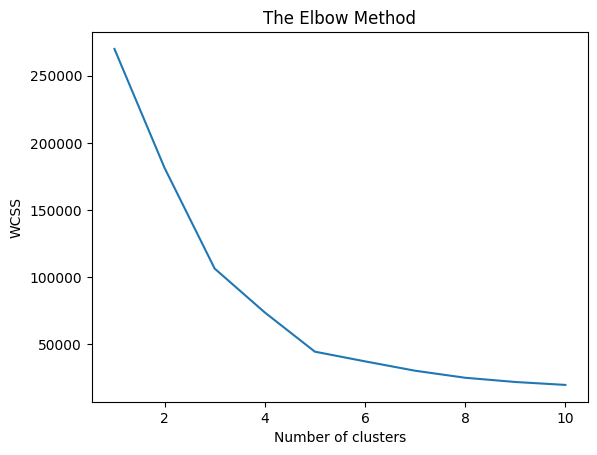

In [3]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11): # 10 is arbitrary pick for number of clusters
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [4]:
# 5 is the optimal number of clusters as identified in the plot above
kmeans = KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
y_kmeans = kmeans.fit_predict(X) # fits and predicts 

In [5]:
print(y_kmeans)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


## Visualising the clusters

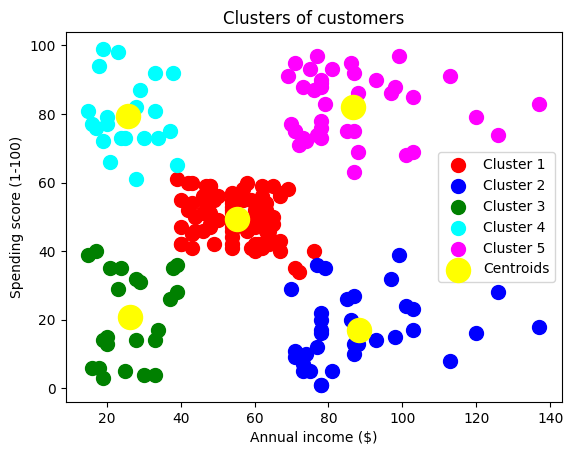

In [6]:
# Annual salary on x-axis, spending score on y-axis
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c="red", label="Cluster 1")
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c="blue", label="Cluster 2")
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c="green", label="Cluster 3")
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c="cyan", label="Cluster 4")
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=100, c="magenta", label="Cluster 5")

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="yellow", label="Centroids")

plt.title('Clusters of customers')
plt.xlabel('Annual income ($)')
plt.ylabel('Spending score (1-100)')
plt.legend()
plt.show()